In [11]:
#Value Noise

#This document attempts to recreate Value noise based on the information on the site Scratchapixel

#Lets start with 1D value noise

#The first step is to create a lattice, in this case a line, of noise values

lattice = []

#length of lattice
latticelength = 20

from random import random
import math

for j in range(latticelength):
    lattice.append(random())
    
#lets take a look at the lattice values
lattice

[0.11597763010988893,
 0.7530646032410441,
 0.020730257305618838,
 0.8828469684714437,
 0.4135733332453452,
 0.08869022558699668,
 0.8353774214399873,
 0.9895729968755819,
 0.14208999669641376,
 0.795525379020997,
 0.6724215131857693,
 0.8419122069412418,
 0.8848894254201445,
 0.6268212144929037,
 0.3544580517971261,
 0.06914266046025397,
 0.6317811668770981,
 0.017880274346619318,
 0.06907962900339415,
 0.8575249865655041]

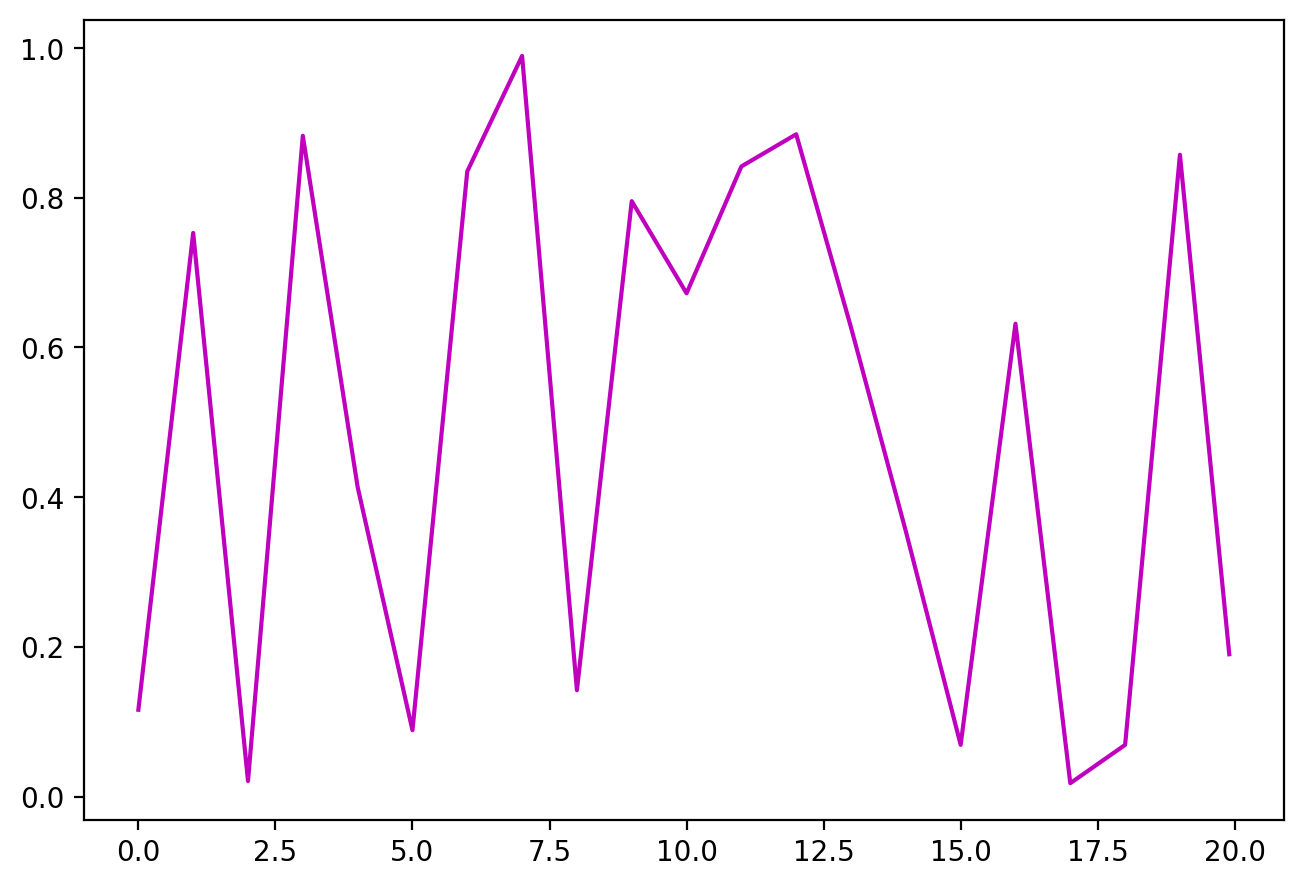

In [12]:
#Ok, we have our lattice.  Now lets graph the noise function.

#Define a resolution for the noise, this will be the number of points between lattice points
noiseresolution = 10

totallength = latticelength*noiseresolution

#Lets go ahead and make a list of all the noise points
noisepoints = []
for j in range(totallength):
    noisepoints.append(j*latticelength/totallength)
    

#Ok, we have our noisepoints.  Now we must calculate the noise value at each point by linearly
#interpolating between the noise values at the surrounding lattice points

def linterp_1D(x,lat):
    
    xnoise = x
    
    #If x exceeds the size of the lattice, subtract multiples of the lattice length until it doesn't
    while(xnoise >= len(lat)):
        xnoise = xnoise-len(lat)
    
    #find the integer bounds
    xlow = math.floor(xnoise)
    #print(xlow)
    xhigh = xlow + 1
    #print(xhigh)
    xnoise = xnoise - xlow
    
    if(xhigh == len(lat)):
        xhigh = 0
    
    #Now interpolate
    noise = lat[xlow]*(1-xnoise)+lat[xhigh]*xnoise
    
    return(noise)

#Ok, lets see what we get
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2

noiselattice = []
for j in range(len(noisepoints)):
    noiselattice.append(linterp_1D(noisepoints[j],lattice))
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(noisepoints,noiselattice,'-m')

    

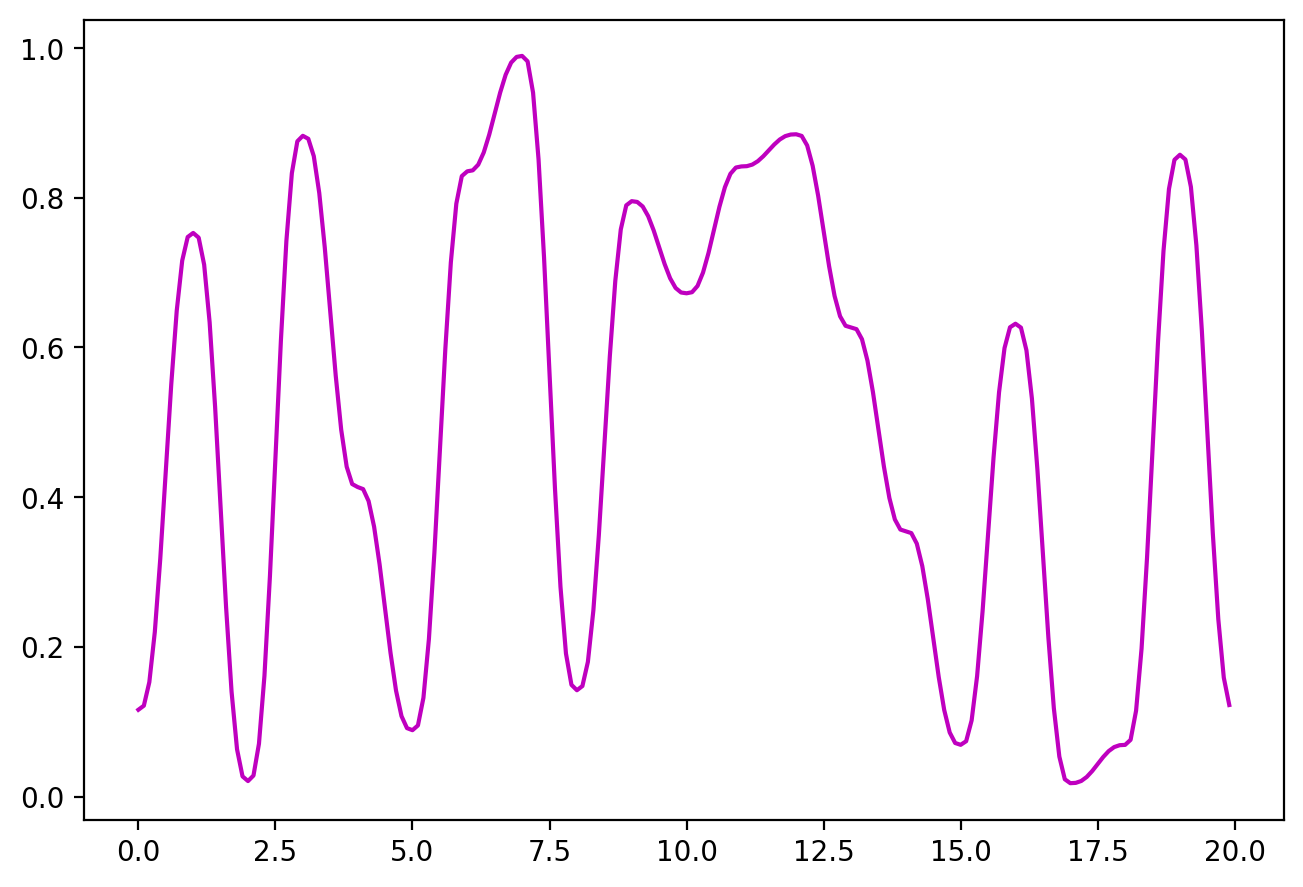

In [13]:
#Ok, almost done with 1D noise, now need to add smoothing function
#I will use Ken Perlin's newer function, 6t^5-15t^4+10t^3

def smoothstep(x):
    return(x*x*x*(10+x*(-15+x*6)))

#Modify linterp for smoothing
def linterpsmooth_1D(x,lat):
    
    xnoise = x
    
    #If x exceeds the size of the lattice, subtract multiples of the lattice length until it doesn't
    while(xnoise >= len(lat)):
        xnoise = xnoise-len(lat)
    
    #find the integer bounds
    xlow = math.floor(xnoise)
    #print(xlow)
    xhigh = xlow + 1
    #print(xhigh)
    xnoise = smoothstep(xnoise - xlow)
    
    if(xhigh == len(lat)):
        xhigh = 0
    
    #Now interpolate
    noise = lat[xlow]*(1-xnoise)+lat[xhigh]*xnoise
    
    return(noise)

noiselattice = []
for j in range(len(noisepoints)):
    noiselattice.append(linterpsmooth_1D(noisepoints[j],lattice))
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(noisepoints,noiselattice,'-m')

#Ok, that is all for 1D

In [14]:
#Ok, now lets take a look at 2D value noise

#Looks like this is the 1D case with an extra interpolation in the perpindicular direction.  
#So first create a 2D lattice of random values

lattice2D = []

#length of lattice in one dimension, lattice will be square
latticelength = 20

for j in range(latticelength):
    dummy = []
    for k in range(latticelength):
        dummy.append(random())
    lattice2D.append(dummy)
        

#now, lets look at it
lattice2D

[[0.17264058491562384,
  0.1180561731124935,
  0.14937904397587976,
  0.7013191826926151,
  0.8706208756312931,
  0.5208669825989716,
  0.8918156531808549,
  0.4058571196486074,
  0.6889619667283907,
  0.09627326702346539,
  0.3586502495881718,
  0.9257610493955707,
  0.4240959654730212,
  0.3086153724272668,
  0.03877741051960337,
  0.09019776492550768,
  0.512455396270833,
  0.5500857679651567,
  0.981822522645718,
  0.027737689853724268],
 [0.7791604058156435,
  0.7827754157148693,
  0.39613608939970435,
  0.10143254196006912,
  0.9779383398000245,
  0.5261770378123819,
  0.3928573712497233,
  0.9463684905812926,
  0.39950011336282176,
  0.7733020528050761,
  0.9458597214859129,
  0.8756841855001039,
  0.5819725079540157,
  0.07789898287252561,
  0.2248239968433955,
  0.2038827524270186,
  0.03326580021713499,
  0.31138257182976525,
  0.21650297215885073,
  0.6591064142288425],
 [0.06297719890007336,
  0.7924506318671241,
  0.6546356067883717,
  0.8344067149387193,
  0.4374213170521

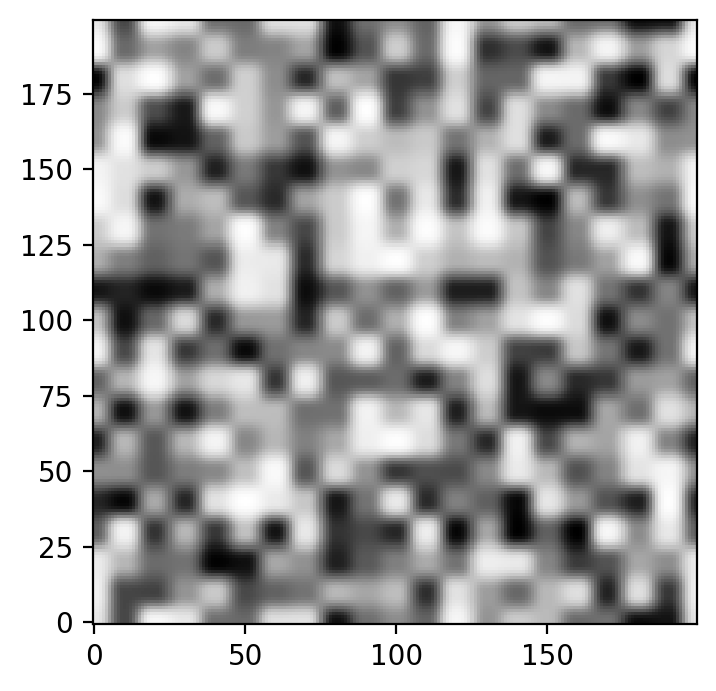

In [15]:
#Now run through noise grid and do interpolations.  I'll do horizontal first, then vertical.

#Lets go ahead and make a list of all the noise points
noisepoints2D = []
for j in range(totallength):
    dummy = []
    for k in range(totallength):
        dummy.append([j*len(lattice2D)/totallength,k*len(lattice2D)/totallength])
    noisepoints2D.append(dummy)

#Interpolating will be a bit harder        
noisegrid2D = []

#create empty noise gird
for j in range(totallength):
    dummy = []
    for k in range(totallength):
        dummy.append(0)
    noisegrid2D.append(dummy)
    
#Now need to rewrite interpolator for 2D grid
def linterpsmooth_2D(x,y,lat):
    
    xnoise = x
    ynoise = y
    
    #need sizes of array, lets not assume square
    sizex = numpy.shape(numpy.array(lat))[0]
    sizey = numpy.shape(numpy.array(lat))[1]    
    
    #If x exceeds the size of the lattice, subtract multiples of the lattice length until it doesn't
    while(xnoise >= sizex):
        xnoise = xnoise-sizex
          
    while(ynoise >= sizey):
        ynoise = ynoise-sizey
    
    #find the integer bounds
    xlow = math.floor(xnoise)
    #print(xlow)
    xhigh = xlow + 1
    #print(xhigh)
    xnoise = smoothstep(xnoise - xlow)
         
    ylow = math.floor(ynoise)
    #print(xlow)
    yhigh = ylow + 1
    #print(xhigh)
    ynoise = smoothstep(ynoise - ylow)

          
          
    if(xhigh == sizex):
        xhigh = 0
    if(yhigh == sizey):
        yhigh = 0
    
    #Now interpolate, horizontal first
    xnoise1 = lat[xlow][ylow]*(1-xnoise)+lat[xhigh][ylow]*xnoise
    xnoise2 = lat[xlow][yhigh]*(1-xnoise)+lat[xhigh][yhigh]*xnoise
    ynoise1 = xnoise1*(1-ynoise)+xnoise2*ynoise
    
    return(ynoise1)
       
#Now try it out.  I think I need to rework my noisepoints for a double loop
#need sizes of array, lets not assume square
sizex = numpy.shape(numpy.array(noisepoints2D))[0]
sizey = numpy.shape(numpy.array(noisepoints2D))[1] 

for j in range(sizex):
    for k in range(sizey):
        noisegrid2D[j][k] = linterpsmooth_2D(noisepoints2D[j][k][0],noisepoints2D[j][k][1],lattice2D)
       
       
plt.imshow(numpy.transpose(noisegrid2D),cmap = 'Greys', origin = 'lower')